In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
sns.set_context("talk")

In [2]:
ad = pd.read_csv("Advertising.csv", usecols=["TV", "radio", "newspaper", "sales"])
ad

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


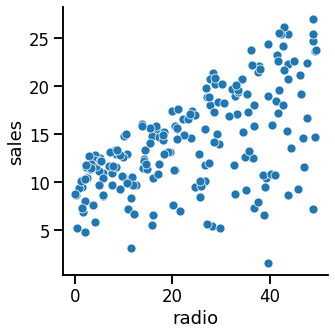

In [3]:
sns.relplot(data=ad, x="radio", y="sales")

In [4]:
def update(X, Y, w, b, alpha):
    dl_dw = 0.0
    dl_db = 0.0
    N = len(X)
    
    for x, y in zip(X, Y):
        f = w * x + b
        dl_dw += -2 * x * (y - f)
        dl_db += -2     * (y - f)
        
    w -= (1 / N) * dl_dw * alpha
    b -= (1 / N) * dl_db * alpha
    
    return w, b

In [5]:
def avg_loss(X, Y, w, b):
    tot_err = sum((y - (w * x + b))**2
                  for x, y in zip(X, Y))
    N = len(X)
    
    return tot_err / N

In [6]:
def train(X, Y, w, b, alpha=0.001, epochs=5000):
    loss = []
    
    for epoch in range(epochs):
        w, b = update(X, Y, w, b, alpha)
        
        if epoch % 400 == 0:
            l = avg_loss(X, Y, w, b)
            loss.append([epoch, l])
            print(f"epoch: {epoch} loss: {l}")
            
    return w, b, loss

In [7]:
X, Y = ad.radio, ad.sales

In [8]:
w, b, loss = train(X, Y, w=0, b=0)

epoch: 0 loss: 92.32078294903626
epoch: 400 loss: 33.79131790081576
epoch: 800 loss: 27.9918542960729
epoch: 1200 loss: 24.33481690722147
epoch: 1600 loss: 22.028754937538633
epoch: 2000 loss: 20.57459375662496
epoch: 2400 loss: 19.657625883308423
epoch: 2800 loss: 19.07940244306619
epoch: 3200 loss: 18.71478514667572
epoch: 3600 loss: 18.48486404079425
epoch: 4000 loss: 18.33987992881413
epoch: 4400 loss: 18.248455556762373
epoch: 4800 loss: 18.19080499291156


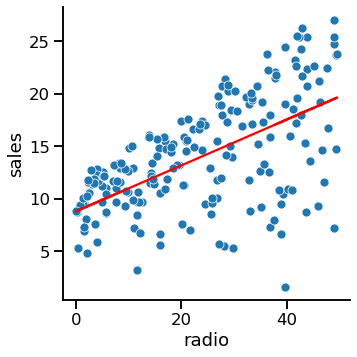

In [9]:
sns.relplot(data=ad, x="radio", y="sales")

y = [w * x + b for x in X]
plt.plot(X, y, 'r')

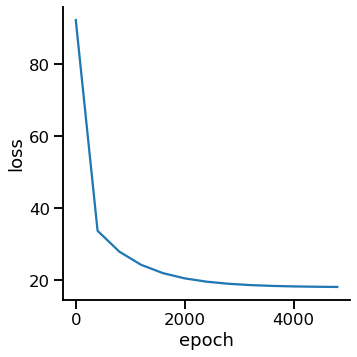

In [10]:
loss = pd.DataFrame(data=loss, columns=["epoch", "loss"])
sns.relplot(data=loss, x="epoch", y="loss", kind="line")

(0.20249578339243965, 9.311638095158283)

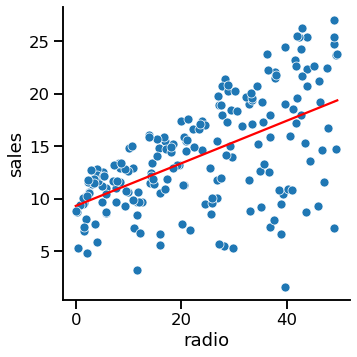

In [11]:
model = LinearRegression()
model = model.fit(ad[["radio"]], ad.sales)

ad["pred"] = model.predict(ad[["radio"]])

sns.relplot(data=ad, x="radio", y="sales")
sns.lineplot(data=ad, x="radio", y="pred", color="red")

model.coef_[0], model.intercept_